# Assignment 7
The document compares the time taken by the naive algorithm, by numpy and by cython (after several modifications) to multiply 2 matrices and provides logical explanation for time taken.

In [ ]:
%reload_ext Cython

## Step 1



In [ ]:
import numpy as np
def matrix_multiply(u, v):
    m, n = u.shape
    n, p = v.shape
    res = np.zeros((m, p))
    for i in range(m):
        for j in range(p):
            res[i,j] = 0
            for k in range(n):
                res[i,j] += u[i,k] * v[k,j]
    return res


In [ ]:
u = np.random.random((10,10))
v = np.random.random((10,10))

In [ ]:
%timeit -n 10 -r 3 matrix_multiply(u, v)

In [ ]:
%timeit -n 20 -r 10 u@v

## Step 2
### Operating frequency of CPU



In [ ]:
import os

# Use the '!cat /proc/cpuinfo' command to get CPU information
cpu_info = !cat /proc/cpuinfo
print(cpu_info[0:8])


## Step 3

In [ ]:
u = np.random.random((20,20))
v = np.random.random((20,20))

In [ ]:
%timeit -n 10 -r 3 matrix_multiply(u, v)

In [ ]:
%timeit -n 20 -r 10 u@v

## Step 4


In [ ]:
import cython

In [ ]:
%%cython -a

import numpy as np
import cython

@cython.boundscheck(False)
@cython.wraparound(False)
def cy_matmul(float[:,:] u,float[:,:] v, float[:,:] res):  
    cdef int m, n, p
    cdef int i, j, k
    m = u.shape[0]
    n = u.shape[1]
    p = v.shape[1]
    for i in range(m):
        for j in range(p):
            res[i,j] = 0
            for k in range(n):
                res[i,j] += u[i,k] * v[k,j]
    return res


In [ ]:
u = np.float32(np.random.random((50,50)))
v = np.float32(np.random.random((50,50)))
res = np.zeros((100, 100), dtype=np.float32)
%timeit -n 20 -r 10 cy_matmul(u, v,res)


In [ ]:
%timeit -n 3 -r 2 matrix_multiply(u, v)

In [ ]:
%timeit -n 20 -r 5 u@v

# Documentation
## Step 1
The number of multiplications is 1000.(Total floating point operations is 1900 which is about twice the number of multiplications). Thus,<br>
- for matrix_multiply() it takes about 1.2 ms to perform 2000 floating point operations.<br> GFLOPS≈ 0.0016
- for np.matmul() it takes about 3 µs to perform 2000 operations. <br> GFLOPS≈ 0.66
## Step 2
The frequency of my processor is 2.20GHz. <br>GFLOPS= 2.2<br> However this frequency is not obtained as FLOPS due to reasons such as:
- the loops that cause branching (which increases time taken)
- usage of a different memory access pattern inside the function
- increase in time due to calling, returning function and parameter passing
- data dependency in loops
- pipelining during execution
- only floating point operations are taken into consideration while various other instructions are performed alongside<br>

Thus only about 1/1100 times of expected GFLOPS is obtained through naive algorithm<br><br>
Numpy manages to provide about 1/3rd of GFLOPS expected
## Step 3
We can go upto 100 X 100 matrices by decreasing the parameters to as much as `%timeit -n 1 -r 1 matrix_multiply(u, v)`. After this it is very slow even for 1 run of 1 loop.<br>
From calculations similar to step 1, we get
- GFLOPS≈ 0.0021 in naive algorithm(1600/7.6ms)
- GFLOPS≈ 5 in numpy.(1600/3.2 µs) <br>

Thus it is comparable to matrix_multiply() and much higher than expected in numpy. This is due to various optimisations performed in numpy as follows:
- vectorisation of matrix
- efficient memory management(cache management, tiling, storing in contiguous memory etc)
- decreasing complexity of algorithm(reducing loops etc)
- compiler level optimisations
- parallelisation and multi- threading
- specifying data type prior



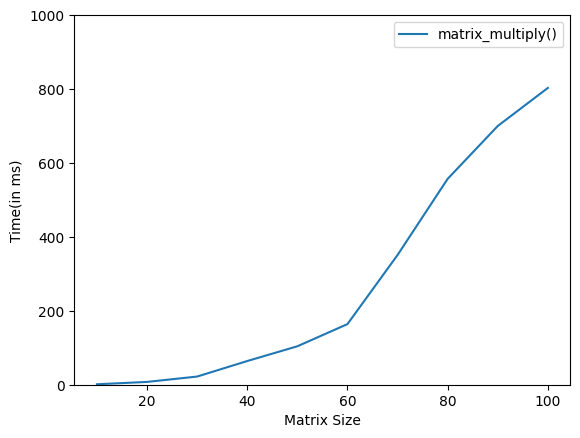
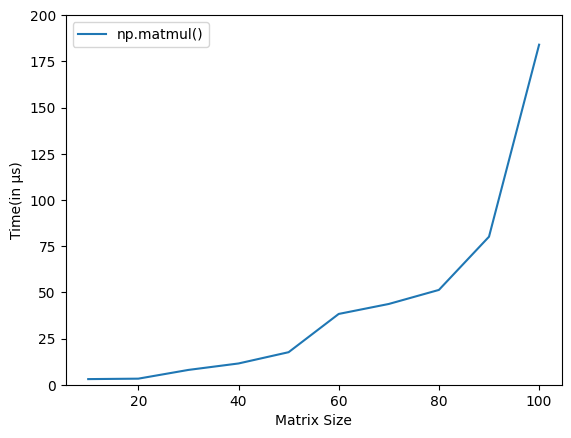
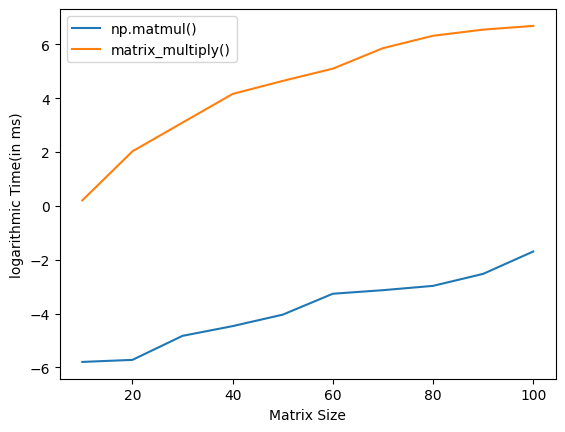

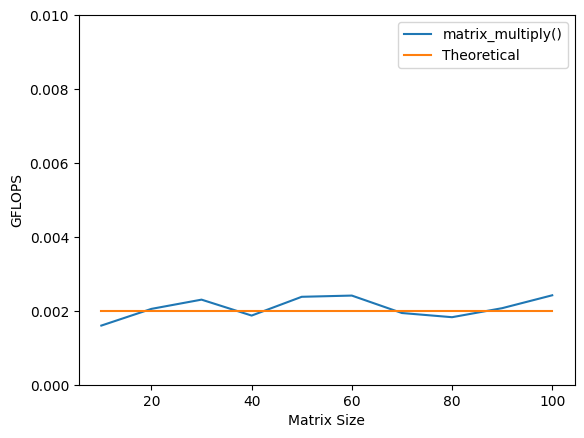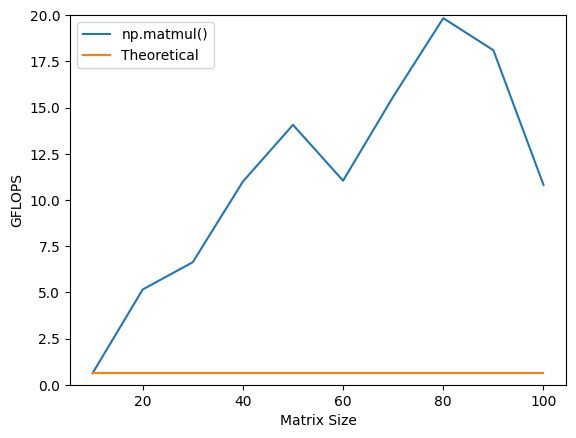
## Step 4
The cython code runs about 1000 times faster than the matrix_multiply(), though its 5-15 times slower than np.matmul(). This is because some optimisations have been made to make it faster


## Step 5

(1) Creating a zero array for the output and passing it as a parameter increases speed by 240 times. This might be due to:

  - Returning a value creates a copy and consumes time and memory.
  - Preallocating can improve data access and hence performance.
  - It can avoid memory allocation overhead and fragmentation.

(2) Using `@cython.boundscheck(False)` increases speed by a small amount when the output is also passed as a parameter and by about 1.6 times if the output isn't passed as an argument. This is because Python checks for exceptions at various places, and this is avoided using `boundscheck(False)`. Without the checks, the code may be more cache-friendly and have lesser memory access time. In the case where output is passed as a parameter, even if bounds are checked it doesn't increase the time much 

(3) Double doesn't increase the time very greatly as compared to float, due to hardware reasons/ the way algorithms are defined. This means that the performance of floating-point operations may be limited by memory access speed or cache performance rather than the intrinsic computational differences between `float` and `double`

(4) Declaring variables `i`, `j`, `k`, `m`, `n`, `p` as `int` types doesn't make much change (in fact, it increases the time taken by a negligible amount). This is because the `u.shape[0]` by default returns an integer, and so the variables `m`, `n`, `p` are initialized as integers irrespective of being declared as integers. Similarly, `range()` objects are also of type 'int'.

Thus the passing of output as an argument is the most essential step.<br>

 The best cython code takes about 0.1 times the np.matmul()

